## Tarea 1

- Tu nombre
- Curso: CM-072

### Empezando con Jupyter

## ● Librerias necesarias

### Numpy

In [1]:
import numpy as np

# Ejemplo de la velocidad de Numpy con respecto a Python

import time
from __future__ import division 

tam_vec = 1000
def lista_python():
    t1 = time.time()
    X = range(tam_vec)
    Y = range(tam_vec)
    Z = []
    for i in range(len(X)):
        Z.append(X[i] + Y[i])
    return time.time() - t1

def matriz_numpy():
    t1 = time.time()
    X = np.arange(tam_vec)
    Y = np.arange(tam_vec)
    Z = X + Y
    return time.time() - t1

t1 = lista_python()
t2 = matriz_numpy()
print(t1, t2)
print("Numpy es en este ejemplo " + str(t1/t2) + " mas rapido!")

0.0007195472717285156 4.1961669921875e-05
Numpy es en este ejemplo 17.147727272727273 mas rapido!


El cálculo con matrices NumPy puede ser muy rápido o puede ser muy lento. La clave para hacer estos cálculos rápidamente, es utilizar las funciones universales (ufuncs)

In [2]:
# Dos matrices necesitan realizar broadcasting

A = np.arange(3).reshape((3, 1))
b = np.arange(3)

A +b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Pandas

In [3]:
import pandas as pd

# Una serie con listas 
s = pd.Series([3, "Python", 3.56, -123999, "ggplot2"])
s

0          3
1     Python
2       3.56
3    -123999
4    ggplot2
dtype: object

In [4]:
# Agregando indices
s1 = pd.Series([7, 'Java', 3.14, -1789710578, 'Hola a todos!'],
              index=['A', 'Z', 'C', 'Y', 'E'])
s1

A                7
Z             Java
C             3.14
Y      -1789710578
E    Hola a todos!
dtype: object

In [5]:
# Ejemplo sobre series en Pandas

import datetime as dt
from pandas import Series, DataFrame, date_range

# dias y fechas
hoy = dt.datetime.strptime('Jan 21 2015', '%b %d %Y')
print (hoy, '\n')
dias = date_range(hoy, periods=35, freq='D')
st = Series(np.random.normal(10, 1, len(dias)), index=dias)

# Extraemos elementos
print (st[0:4], '\n')
print (st['2015-01-21':'2015-01-28'], '\n') 
df = st.resample(rule ='W', how =('mean', 'std', lambda x: sum(x*x)))
df  

2015-01-21 00:00:00 

2015-01-21    8.029186
2015-01-22    9.309511
2015-01-23    9.728916
2015-01-24    9.661112
Freq: D, dtype: float64 

2015-01-21     8.029186
2015-01-22     9.309511
2015-01-23     9.728916
2015-01-24     9.661112
2015-01-25     8.651248
2015-01-26     9.430886
2015-01-27     8.948736
2015-01-28    10.357261
Freq: D, dtype: float64 



/home/c-lara/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


,mean,std,<lambda>
2015-01-25,9.075994,0.724468,413.967791
2015-02-01,9.846795,0.771511,682.286964
2015-02-08,9.708258,1.135946,667.494125
2015-02-15,9.993097,0.989045,704.903179
2015-02-22,9.530204,0.890899,640.535776
2015-03-01,9.032706,0.454870,163.386450


In [8]:
# Data frame
print(type(df))

#Renombrando columnas

df.columns = ('media', 'desviacion', 'suma_cuad')
print(df)

<class 'pandas.core.frame.DataFrame'>
               media  desviacion   suma_cuad
2015-01-25  9.075994    0.724468  413.967791
2015-02-01  9.846795    0.771511  682.286964
2015-02-08  9.708258    1.135946  667.494125
2015-02-15  9.993097    0.989045  704.903179
2015-02-22  9.530204    0.890899  640.535776
2015-03-01  9.032706    0.454870  163.386450


In [9]:
# Divide-aplica-combina

url = 'https://raw.github.com/pydata/pandas/master/pandas/tests/data/tips.csv'
tips = pd.read_csv(url)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
# Dividimos la base de datos sex y smoker en 2x2 grupos 

grupos = tips.groupby(['sex', 'smoker'])
grupos

In [11]:
# Contamos el numero de entradas por grupo

grupos.size()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
dtype: int64

In [12]:
# Agregamos margenes

pd.crosstab(tips.sex, tips.smoker, margins=True)

smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


In [13]:
# Realizamos un estandarizacion de unidades para total_bill y tips

zscore = lambda x: (x - x.mean())/x.std()

std_grupos = grupos['total_bill', 'tip'].transform(zscore)
std_grupos.head(n=4)

,total_bill,tip
0,-0.153049,-1.562813
1,-1.083042,-0.975727
2,0.139661,0.259539
3,0.445623,0.131984


In [14]:
# Aplicamos algunas funciones al conjunto de datos

grupos['total_bill', 'tip'].agg(['mean', 'min', 'max'])

total_bill                    tip            
                    mean   min    max      mean   min   max
sex    smoker                                              
Female No      18.105185  7.25  35.83  2.773519  1.00   5.2
       Yes     17.977879  3.07  44.30  2.931515  1.00   6.5
Male   No      19.791237  7.51  48.33  3.113402  1.25   9.0
       Yes     22.284500  7.25  50.81  3.051167  1.00  10.0

### Matplotlib

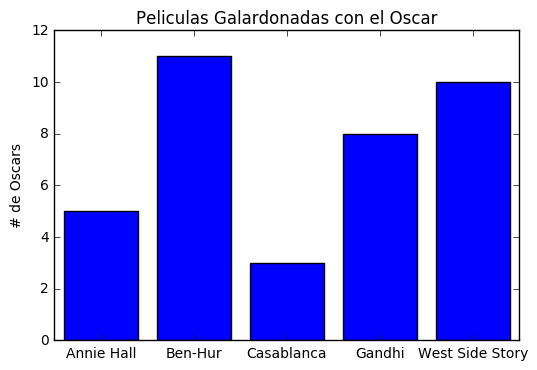

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

peliculas = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# Centremos las barras
xs = [i + 0.1 for i, _ in enumerate(peliculas)]
plt.bar(xs, num_oscars)

plt.ylabel("# de Oscars")
plt.title("Peliculas Galardonadas con el Oscar")
# Etiquetamos el eje X con el nombre de las peliculas en el centro de las barras
plt.xticks([i + 0.5 for i, _ in enumerate(peliculas)], peliculas)
plt.show()


### Seaborn

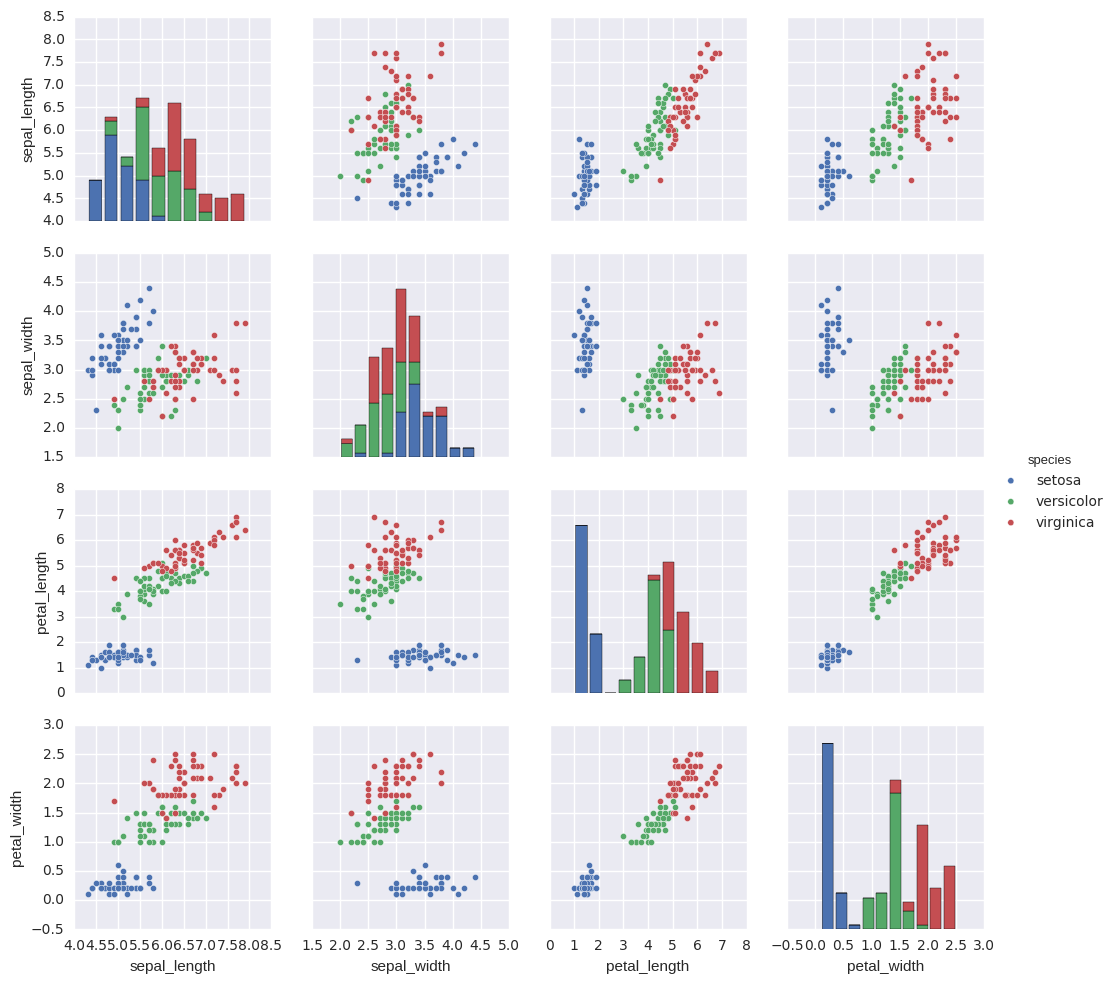

In [16]:
import seaborn as sb

# Ejemplo con Iris datasets
iris = sb.load_dataset("iris")
iris.head()
sb.pairplot(iris, hue="species", size=2.5)

plt.show()

## ● Código

## [TitanicDataset](https://www.kaggle.com/c/titanic/data)

In [17]:
titanic_data = pd.read_csv('titanic-data.csv')

##### titanic_data ahora es un  [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html "Go to the DataFrame documentation!") de  Pandas.

In [18]:
titanic_data.shape

(891, 12)

In [19]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [21]:
titanic_data["Age"].mean()

29.69911764705882

En el momento en que accedemos a una columna de un DataFrame, el objeto devuelto es un [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series).

In [22]:
type(titanic_data["Survived"])

pandas.core.series.Series

In [23]:
titanic_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

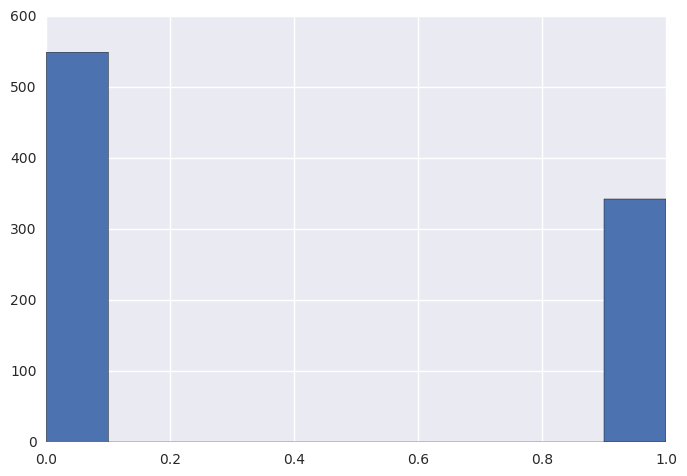

In [24]:
titanic_data["Survived"].hist()

In [25]:
titanic_data.loc[titanic_data["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [26]:
titanic_data.loc[titanic_data["Sex"]=='male'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [27]:
len(titanic_data.loc[(titanic_data["Sex"]=='male') & (titanic_data["Survived"]==1)])

109

# Tarea

In [28]:
# Columnas del data frame
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
# Consiguiendo información del data frame
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


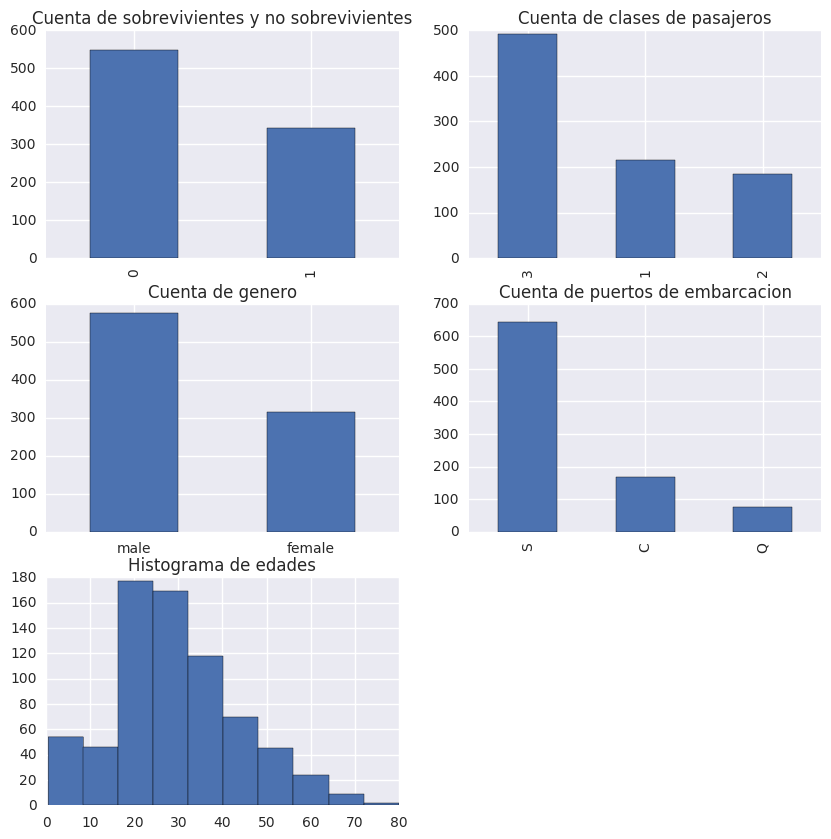

In [30]:
# Configuracion de algunos graficos (kaggle.com)

fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)

# Grafico de sobrevivientes y no sobrevivientes
plt.subplot2grid(fig_dims, (0, 0))
titanic_data['Survived'].value_counts().plot(kind='bar', 
                                         title='Cuenta de sobrevivientes y no sobrevivientes')

# Grafico de la  cuenta de la clase de pasajeros
plt.subplot2grid(fig_dims, (0, 1))
titanic_data['Pclass'].value_counts().plot(kind='bar', 
                                       title='Cuenta de clases de pasajeros')

# Grafico de la cuenta de sexo de los pasajeros 
plt.subplot2grid(fig_dims, (1, 0))
titanic_data['Sex'].value_counts().plot(kind='bar', 
                                    title='Cuenta de genero')
plt.xticks(rotation=0)

# Grafico de cuenta de embarque
plt.subplot2grid(fig_dims, (1, 1))
titanic_data['Embarked'].value_counts().plot(kind='bar', 
                                         title='Cuenta de puertos de embarcacion')

# Grafico de un histograma de edades
plt.subplot2grid(fig_dims, (2, 0))
titanic_data['Age'].hist()
plt.title('Histograma de edades')

### ● Cuántas personas de la clase 1 no sobrevivieron?

In [44]:
import pandas as pd
titanic_data = pd.read_csv('titanic-data.csv')

len (titanic_data.loc[
        (titanic_data['Survived'] == 0) & 
        (titanic_data['Pclass'] == 1)
])

80

### ● En qué propiedades encontraste valores perdidos? podrías deshacerte de ellos?

In [91]:
missing_values = titanic_data.isna().any()
print("valores con nan: ",
    list(
        missing_values[
            missing_values == True
        ].index
    )
)

valores con nan:  ['Age', 'Cabin', 'Embarked']


In [109]:
titanic_data = titanic_data.dropna()
titanic_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

### ● Muestre si al menos un infante de Queenstown sobrevivió? y de los otros puertos de embarcación, existen infantes sobrevivientes?

In [135]:
for target in titanic_data['Embarked'].unique():
    print("Infantes sobrevivientes en el puerto", target, ":", len(
        titanic_data.loc[
            (titanic_data['Embarked'] == target) &
            (titanic_data['Age'] <= 5)
        ]
    ))
print("No habia infantes en Queenstown.")
print("Entre las otras embarcaciones habia 9 sobrevivientes.")

Infantes sobrevivientes en el puerto C : 0
Infantes sobrevivientes en el puerto S : 9
Infantes sobrevivientes en el puerto Q : 0
No habia infantes en Queenstown.
Entre las otras embarcaciones habia 9 sobrevivientes.


### ● Cuántas mujeres mayores de 20 años sobrevivieron?

In [132]:
print("Numero de mujeres mayores a 20 agnos que sobrevivieron:", len(
    titanic_data.loc[
        (titanic_data['Sex'] == 'female') &
        (titanic_data['Age'] > 20) &
        (titanic_data['Survived'] == 1)
    ]
))

Numero de mujeres mayores a 20 agnos que sobrevivieron: 67
